In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

# Define Problem Statement and perform Exploratory Data Analysis

## Defination of Problem

What factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## Observations on data

In [79]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [80]:
df.shape

(500, 9)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [82]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [83]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [84]:
df.columns =['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit']

## Univariate Analysis

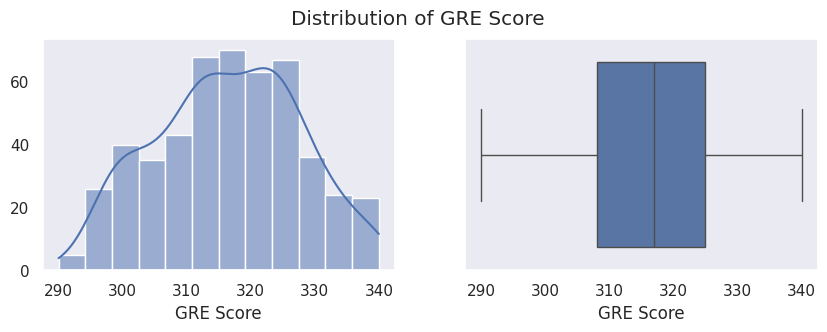

In [85]:
plt.figure(figsize = (10,3))
plt.suptitle("Distribution of GRE Score")

plt.subplot(1,2,1)
sns.histplot(data = df,x = 'GRE Score',kde=True)
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'GRE Score',)

plt.show()

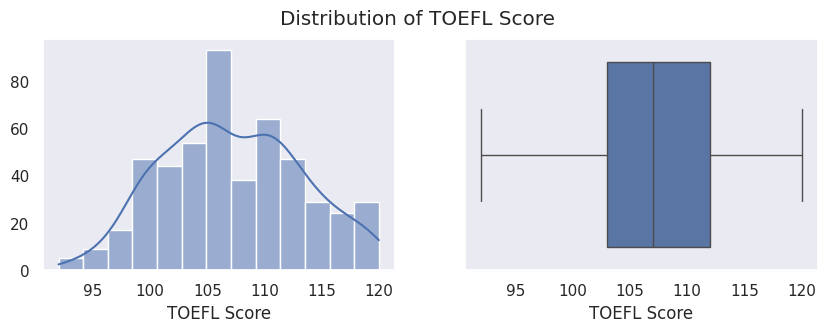

In [86]:
plt.figure(figsize = (10,3))
plt.suptitle("Distribution of TOEFL Score")

plt.subplot(1,2,1)
sns.histplot(data = df,x = 'TOEFL Score',kde=True)
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'TOEFL Score',)

plt.show()

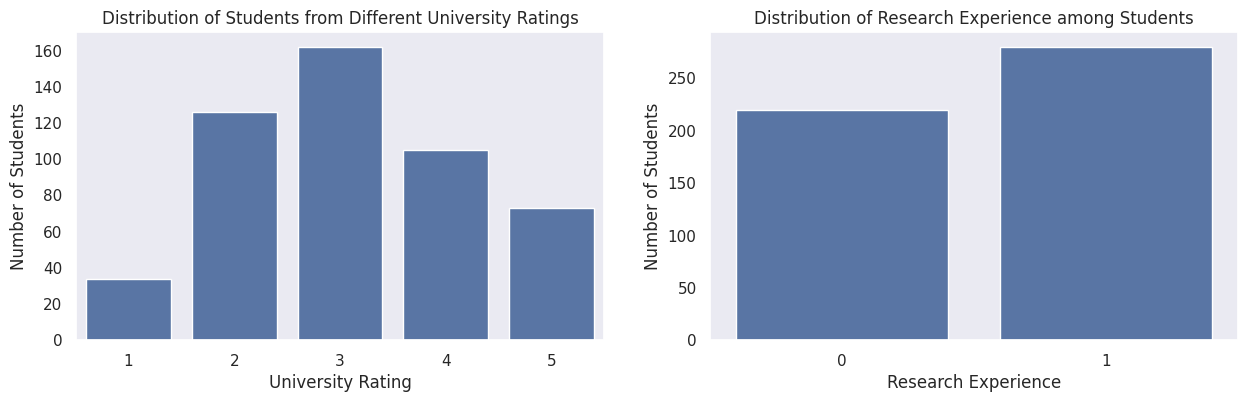

In [87]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.countplot(data = df,x = 'University Rating')
plt.xlabel('University Rating')
plt.ylabel('Number of Students')
plt.title('Distribution of Students from Different University Ratings')

plt.subplot(1,2,2)
sns.countplot(data = df,x = 'Research')
plt.ylabel('Number of Students')
plt.xlabel('Research Experience')
plt.title('Distribution of Research Experience among Students')


plt.show()

In [88]:
df['Research'].value_counts(normalize = True)

1    0.56
0    0.44
Name: Research, dtype: float64

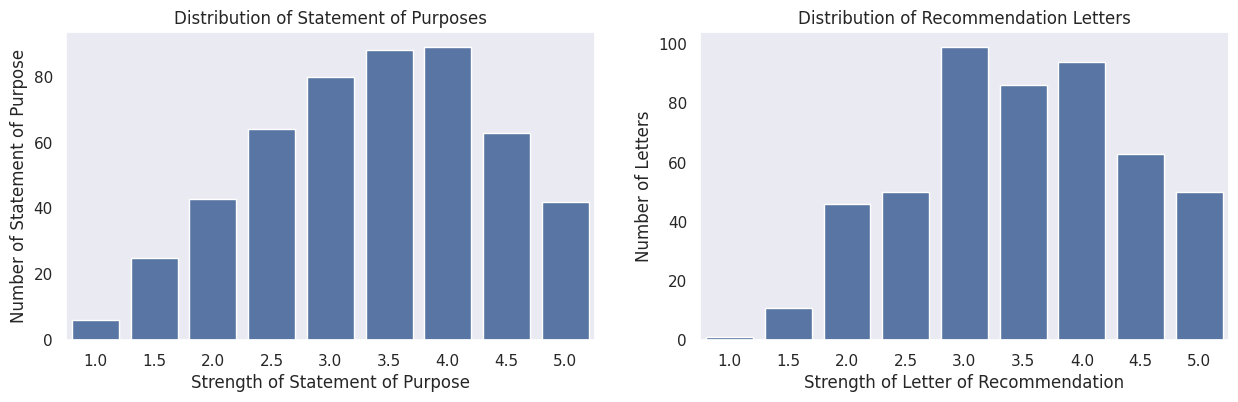

In [89]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.countplot(data = df,x = 'SOP')
plt.ylabel('Number of Statement of Purpose')
plt.xlabel('Strength of Statement of Purpose')
plt.title('Distribution of Statement of Purposes')

plt.subplot(1,2,2)
sns.countplot(data = df,x = 'LOR')
plt.ylabel('Number of Letters')
plt.xlabel('Strength of Letter of Recommendation')
plt.title('Distribution of Recommendation Letters')

plt.show()

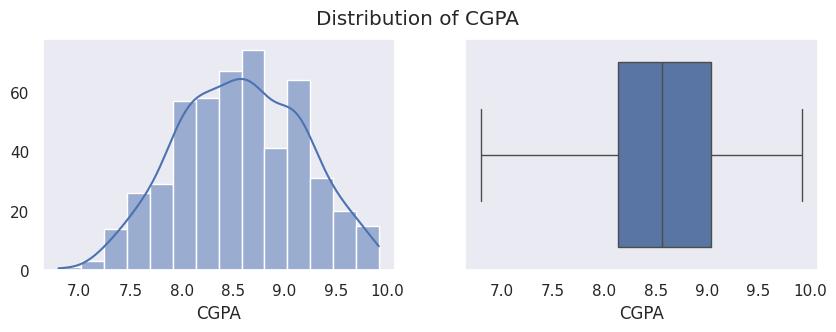

In [90]:
plt.figure(figsize = (10,3))
plt.suptitle("Distribution of CGPA")

plt.subplot(1,2,1)
sns.histplot(data = df,x = 'CGPA',kde=True)
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'CGPA',)

plt.show()

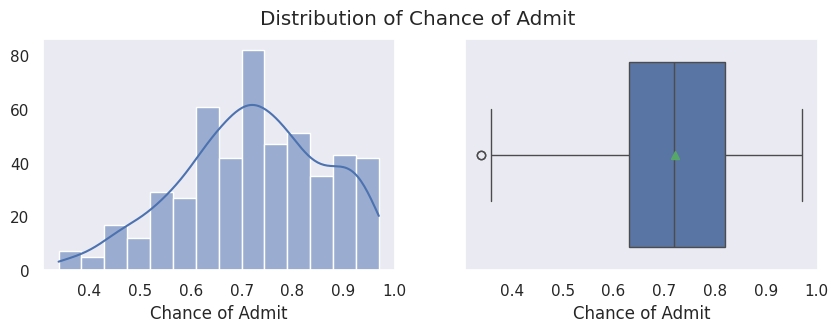

In [91]:
plt.figure(figsize = (10,3))
plt.suptitle("Distribution of Chance of Admit")

plt.subplot(1,2,1)
sns.histplot(data = df,x = 'Chance of Admit',kde=True)
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'Chance of Admit',showmeans = True)


plt.show()

### Observations
1. Most of the applicants have GRE and TOEFL score around 310-325 and 103-113 respectively.
2. Most of the applicants are from a university whose rating is 3.
3. 44% of the applicants that apply have no research experience, 56% have research experience.
4. Strength of SOP and LOR for most of the applicants are around 3-4.

## Bivariate Analysis

In [92]:
categorical = ['University Rating', 'SOP', 'LOR', 'Research']
numerical =[i for i in df.columns if i not in categorical]
print("categorical columns:",categorical)
print("numerical columns:",numerical)

categorical columns: ['University Rating', 'SOP', 'LOR', 'Research']
numerical columns: ['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']


Qualitative palettes: These are used for categorical data and include deep, pastel, bright, dark, colorblind, and muted.
Sequential palettes: These are used for ordered data and include rocket, mako, flare, crest, Blues, YlOrBr, magma, and viridis.
Diverging palettes: These are used for data where both large low and high values are interesting and span a midpoint. Some examples include coolwarm, PuOr, RdBu, and BrBG.

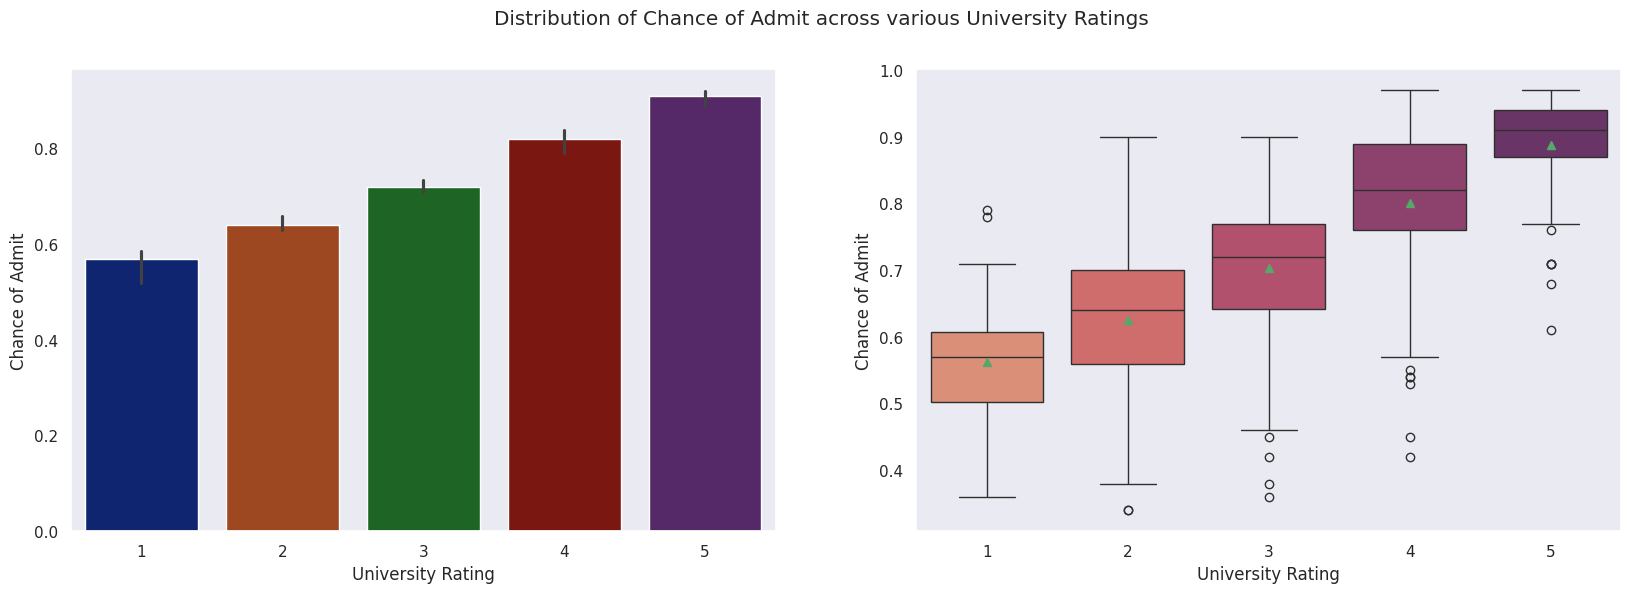

In [93]:
plt.figure(figsize = (20,6))
sns.set(style="dark")
dark_palette = sns.color_palette("dark", 5)


plt.suptitle("Distribution of Chance of Admit across various University Ratings")

plt.subplot(1,2,1)
sns.barplot(data = df,x = 'University Rating', y = 'Chance of Admit',estimator = 'median',palette=dark_palette)

palette2 = sns.color_palette("flare", 5)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='University Rating', y='Chance of Admit',showmeans = True,palette=palette2)


plt.show()

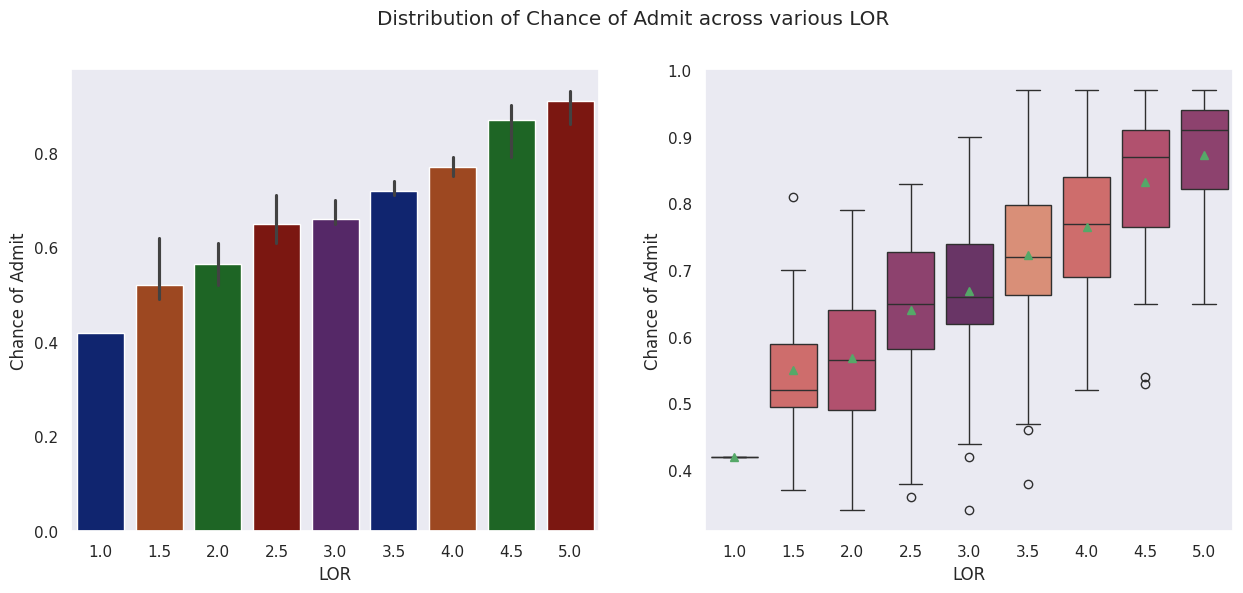

In [94]:
plt.figure(figsize = (15,6))
sns.set(style="dark")
dark_palette = sns.color_palette("dark", 5)


plt.suptitle("Distribution of Chance of Admit across various LOR")

plt.subplot(1,2,1)
sns.barplot(data = df,x = 'LOR', y = 'Chance of Admit',estimator = 'median',palette=dark_palette)

palette2 = sns.color_palette("flare", 5)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='LOR', y='Chance of Admit',showmeans = True,palette=palette2)


plt.show()

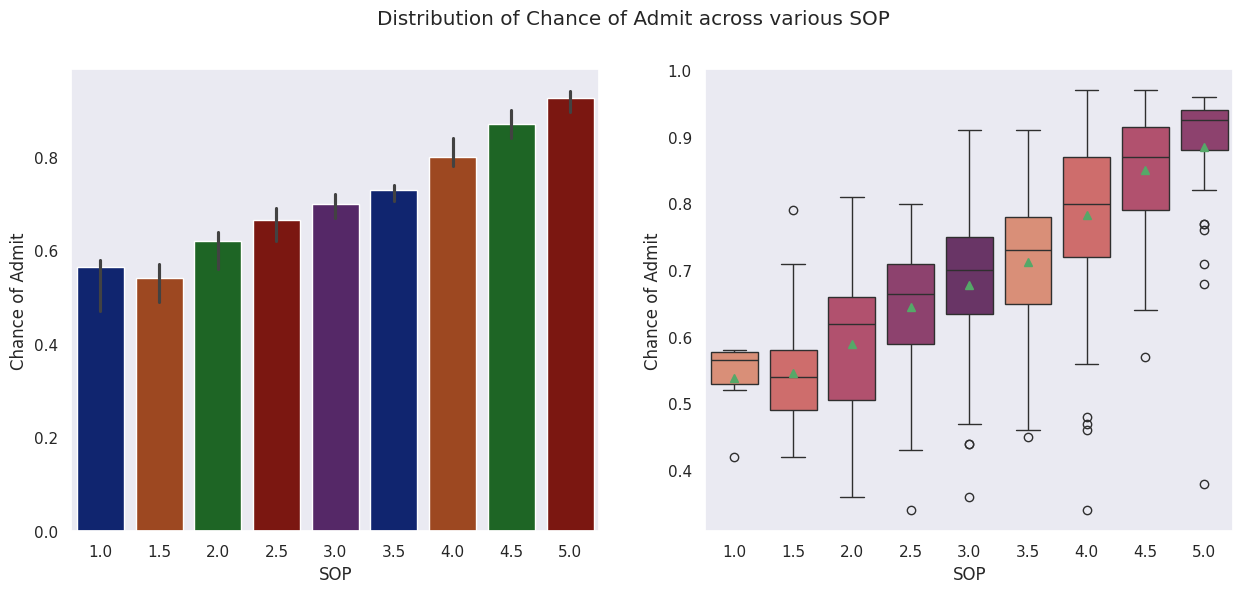

In [95]:
plt.figure(figsize = (15,6))
sns.set(style="dark")
dark_palette = sns.color_palette("dark", 5)


plt.suptitle("Distribution of Chance of Admit across various SOP")

plt.subplot(1,2,1)
sns.barplot(data = df,x = 'SOP', y = 'Chance of Admit',estimator = 'median',palette=dark_palette)

palette2 = sns.color_palette("flare", 5)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='SOP', y='Chance of Admit',showmeans = True,palette=palette2)


plt.show()

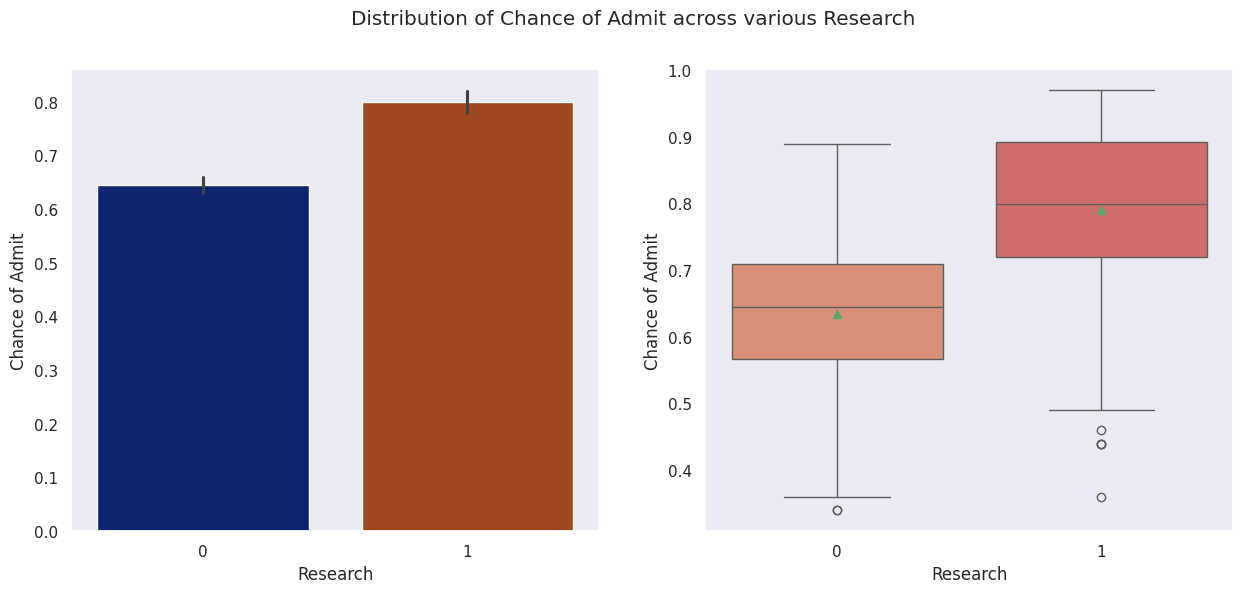

In [96]:
plt.figure(figsize = (15,6))
sns.set(style="dark")
dark_palette = sns.color_palette("dark", 5)


plt.suptitle("Distribution of Chance of Admit across various Research")

plt.subplot(1,2,1)
sns.barplot(data = df,x = 'Research', y = 'Chance of Admit',estimator = 'median',palette=dark_palette)

palette2 = sns.color_palette("flare", 5)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Research', y='Chance of Admit',showmeans = True,palette=palette2)


plt.show()

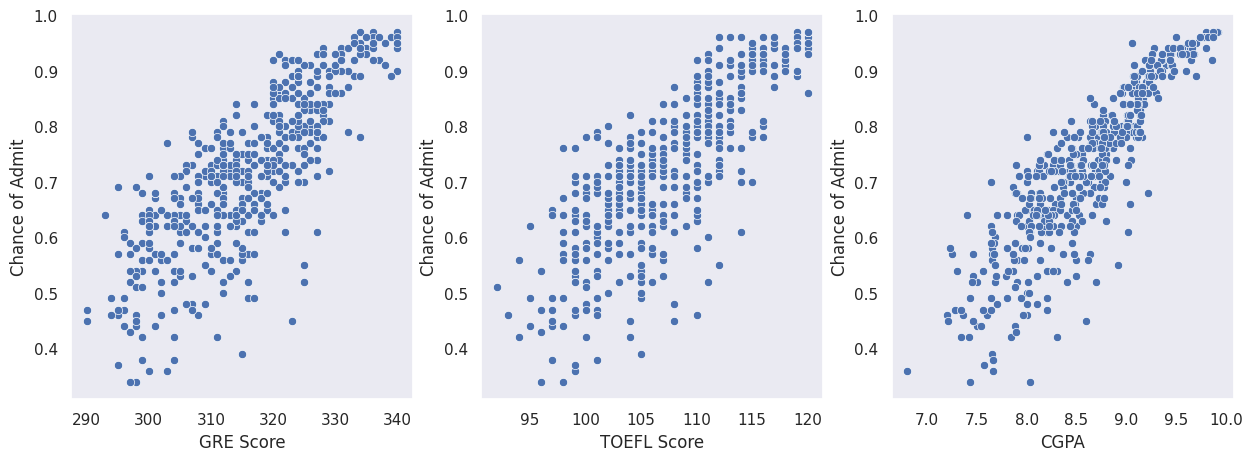

In [97]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.scatterplot(data = df,x = 'GRE Score',y = 'Chance of Admit')
plt.subplot(1,3,2)
sns.scatterplot(data = df,x = 'TOEFL Score',y = 'Chance of Admit')
plt.subplot(1,3,3)
sns.scatterplot(data = df,x = 'CGPA',y = 'Chance of Admit')

plt.show()

### Observations
1. Students from top-rated universities, higher LOR and SOP strengths and with Research experience are more likely to be admitted.
2. Applicants with Higher GRE Score, TOEFL Score and CGPA are more likely to get admitted.


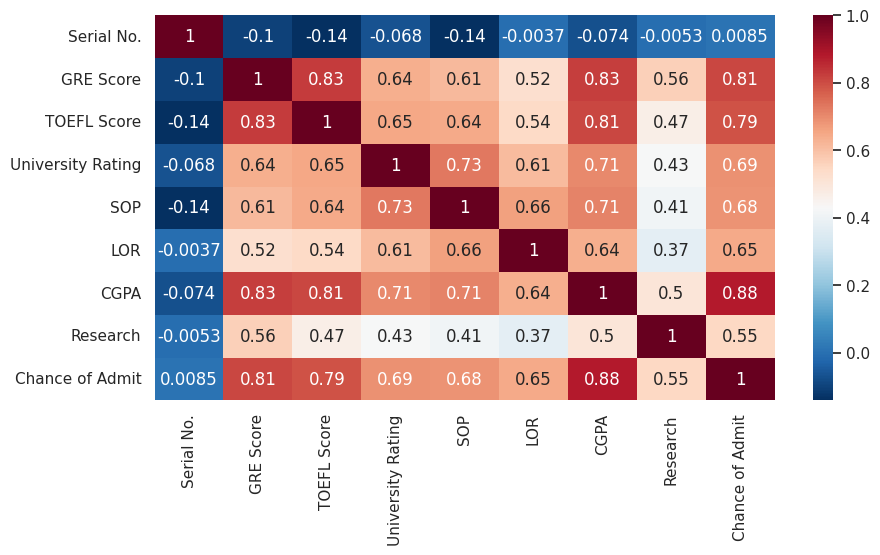

In [98]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True,cmap = 'RdBu_r')
plt.show()

### Observations:
1. Except for Research column we can see other columns to be more correlated with Chance of Admit

# Data Preprocessing

## Duplicate Value Check

In [99]:
df.duplicated().sum()

0

## Missing Value Check

In [100]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Outlier Treatment

From univariate Analysis we can hardly see any outliers in the dataset. Thus, no need for Outlier Treatment

## Train Test Split

In [101]:
X = df.drop(['Serial No.','Chance of Admit'],axis = 1)
y = df['Chance of Admit']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

## Scaling

In [103]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

# Model Building

## Baseline Model

In [104]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [105]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

y_pred_train_baseline = y_pred_train
y_pred_test_baseline = y_pred_test

residual_lasso_test = y_pred_test_baseline - y_test
residual_lasso_train = y_pred_train_baseline - y_train

In [106]:
def adj_r(r_squared, X, y):
    n = len(y)
    k = X.shape[1]

    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adj_r_squared

In [107]:
print('\n','-'*30,'R2 Score','-'*30,sep = '')
r2_train = model.score(X_train_scaled,y_train)
r2_test = model.score(X_test_scaled,y_test)
print("Training R2 Score for baseline Model:",r2_train)
print("Testing R2 Score for baseline Model:",r2_test)

print('\n','-'*30,'Adj R2','-'*30,sep = '')
print("Training R2 Score for baseline Model:",adj_r(r2_train,X_train_scaled,y_train))
print("Testing R2 Score for baseline Model:",adj_r(r2_test,X_test_scaled,y_test))

print('\n','-'*30,'MAE','-'*30,sep = '')
print("Training MAE Score for baseline Model:",mae(y_pred_train,y_train))
print("Testing MAE Score for baseline Model:",mae(y_pred_test,y_test))

print('\n','-'*30,'MSE','-'*30,sep = '')
print("Training MSE Score for baseline Model:",mse(y_pred_train,y_train))
print("Testing MSE Score for baseline Model:",mse(y_pred_test,y_test))

print('\n','-'*30,'RMSE','-'*30,sep = '')
print("Training MSE Score for baseline Model:",np.sqrt(mse(y_pred_train,y_train)) )
print("Testing MSE Score for baseline Model:",np.sqrt(mse(y_pred_test,y_test)))




------------------------------R2 Score------------------------------
Training R2 Score for baseline Model: 0.8189485361012616
Testing R2 Score for baseline Model: 0.8273189974869111

------------------------------Adj R2------------------------------
Training R2 Score for baseline Model: 0.8154952384247189
Testing R2 Score for baseline Model: 0.8169876554562134

------------------------------MAE------------------------------
Training MAE Score for baseline Model: 0.04254015091238289
Testing MAE Score for baseline Model: 0.04150551047946545

------------------------------MSE------------------------------
Training MSE Score for baseline Model: 0.0036710624396398663
Testing MSE Score for baseline Model: 0.0032280859516578973

------------------------------RMSE------------------------------
Training MSE Score for baseline Model: 0.060589293110580734
Testing MSE Score for baseline Model: 0.05681624725074595


In [108]:
residual_baseline_test = y_pred_test - y_test
residual_baseline_train = y_pred_train - y_train

### Observations
1. MSE, MAE and RMSE are less even the R2 and Adj R2 score is good for this model.

## Feature Importance of Baseline Model

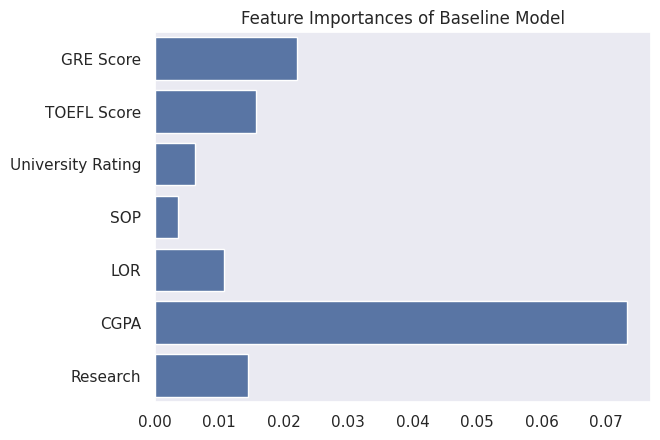

In [109]:
sns.barplot(x = model.coef_,y = X_train.columns)
plt.ylabel('')
plt.title("Feature Importances of Baseline Model")
plt.show()

## Model Statistics

In [110]:
X_train_scaled = scaler.fit_transform(X_train)
X_sm = sm.add_constant(X_train_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     237.1
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          5.48e-132
Time:                        19:27:52   Log-Likelihood:                 519.26
No. Observations:                 375   AIC:                            -1023.
Df Residuals:                     367   BIC:                            -991.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7218      0.003    228.233      0.0

### Observations
1. x2, x5, x6, and x7 have statistically significant positive effects on the chance of admit.
2. x1 and x3 do not have statistically significant effects on the chance of admit.
3. x4 have statistically negative effects on the chance of admit.


## Polynomial Regression

In [111]:
train_scores = []
test_scores = []
adj_train_scores = []
adj_test_scores = []
for i in range(1,6):
  # polynomial features
  poly =  PolynomialFeatures(i)
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.transform(X_test)

  #standardizing the polynomial features
  X_poly_train_scaled = pd.DataFrame(scaler.fit_transform(X_poly_train))
  X_poly_test_scaled = pd.DataFrame(scaler.transform(X_poly_test))

  #model fitting
  lr_model = LinearRegression()
  lr_model.fit(X_poly_train_scaled,y_train)

  print(f"Degree - {i}, shape test {X_poly_train_scaled.shape}, shape test {X_poly_test_scaled.shape}")

  r2_train = lr_model.score(X_poly_train_scaled,y_train)
  r2_test = lr_model.score(X_poly_test_scaled,y_test)
  train_scores.append(r2_train)
  test_scores.append(r2_test)

  adj_r2_train = adj_r(r2_train, X_poly_train_scaled, y_train)
  adj_r2_test = adj_r(r2_test,X_poly_test_scaled,y_test)

  adj_train_scores.append(adj_r2_train)
  adj_test_scores.append(adj_r2_test)



Degree - 1, shape test (375, 8), shape test (125, 8)
Degree - 2, shape test (375, 36), shape test (125, 36)
Degree - 3, shape test (375, 120), shape test (125, 120)
Degree - 4, shape test (375, 330), shape test (125, 330)
Degree - 5, shape test (375, 792), shape test (125, 792)


In [112]:
test_scores

[0.8273189974869112,
 0.6154631413264328,
 0.37843121980325256,
 -12.70576159019272,
 -623.4919511100999]

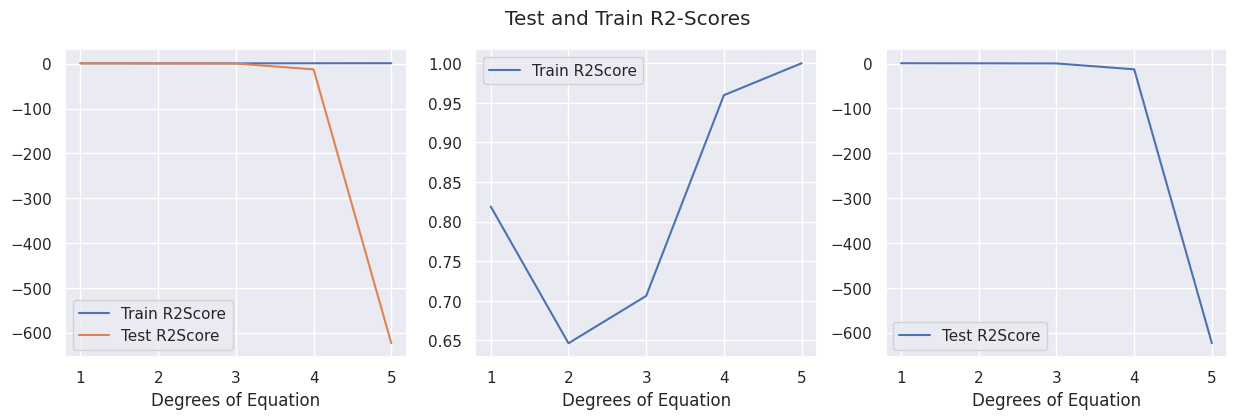

In [113]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.lineplot(x = range(1,6),y = train_scores,label = 'Train R2Score')
sns.lineplot(x = range(1,6),y = test_scores,label = 'Test R2Score')
plt.xlabel('Degrees of Equation')
plt.grid()
plt.legend()

plt.subplot(1,3,2)
sns.lineplot(x = range(1,6),y = train_scores,label = 'Train R2Score')
plt.xlabel('Degrees of Equation')
plt.grid()

plt.subplot(1,3,3)
sns.lineplot(x = range(1,6),y = test_scores,label = 'Test R2Score')
plt.xlabel('Degrees of Equation')
plt.grid()

plt.suptitle('Test and Train R2-Scores')
plt.show()

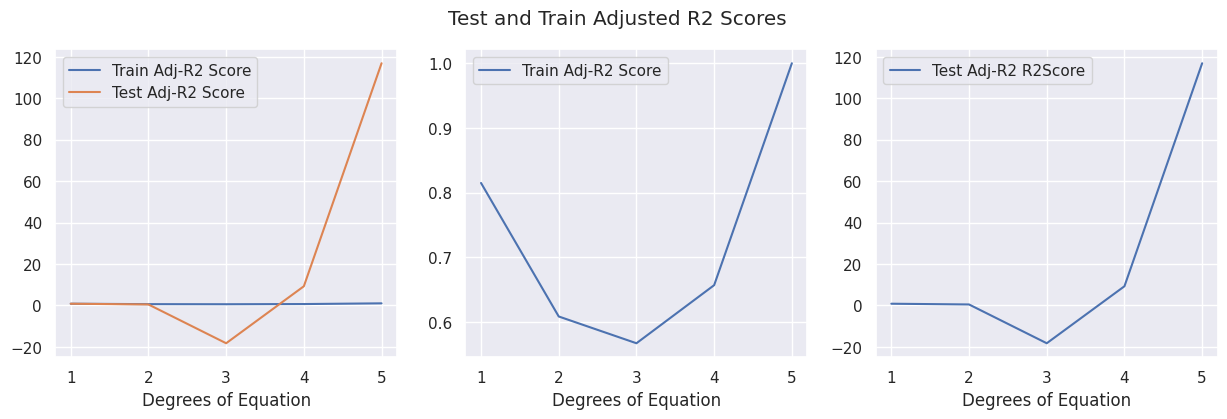

In [114]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.lineplot(x = range(1,6),y = adj_train_scores,label = 'Train Adj-R2 Score')
sns.lineplot(x = range(1,6),y = adj_test_scores,label = 'Test Adj-R2 Score')
plt.xlabel('Degrees of Equation')
plt.legend()
plt.grid()

plt.subplot(1,3,2)
sns.lineplot(x = range(1,6),y = adj_train_scores,label = 'Train Adj-R2 Score')
plt.xlabel('Degrees of Equation')
plt.grid()

plt.subplot(1,3,3)
sns.lineplot(x = range(1,6),y = adj_test_scores,label = 'Test Adj-R2 R2Score')
plt.xlabel('Degrees of Equation')
plt.grid()

plt.suptitle('Test and Train Adjusted R2 Scores')
plt.show()

In [115]:
adj_train_scores,adj_test_scores

([0.8149911270542947,
  0.6086711700643379,
  0.5673118183858704,
  0.6570874685543914,
  1.0],
 [0.8154099628308361,
  0.45815260823270065,
  -18.268632186099172,
  9.250070083416977,
  116.923655595288])

### Observations
1. After observing the r2 and adjusted r2 score, **polynomial of degree one is the best degree polynomial** for this dataset

## Lasso Regression

In [116]:
lasso_test_scores = []
lasso_train_scores = []
for alpha in [1e-6, 1e-5, 1e-4, 1e-3, 0.01]:
	lasso_model = Lasso(alpha = alpha)
	lasso_model.fit(X_train_scaled,y_train)

	lasso_test_scores.append(lasso_model.score(X_test_scaled,y_test))
	lasso_train_scores.append(lasso_model.score(X_train_scaled,y_train))

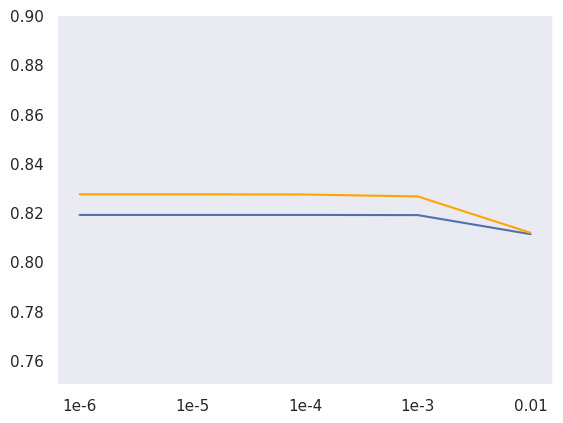

In [117]:
alpha_values = ['1e-6', '1e-5', '1e-4', '1e-3', '0.01']
sns.lineplot(x = alpha_values,y = lasso_train_scores)
sns.lineplot(x = alpha_values,y = lasso_test_scores,color='orange')
plt.ylim([0.75,0.90])
plt.show()

### Observations
From here we know that with alpha 1e-6 lasso performs the best. <strong>Alpha = 1e-6 refers the weightage of L1 Regression is verry very small.</strong>
<br>Fitting below Lasso model with alpha 1e-6 and finding the score for various metrics

In [118]:
lasso_model = Lasso(alpha = 1e-6)
lasso_model.fit(X_train_scaled,y_train)

y_pred_train = lasso_model.predict(X_train_scaled)
y_pred_test = lasso_model.predict(X_test_scaled)

y_pred_train_lasso = y_pred_train
y_pred_test_lasso = y_pred_test_baseline

print('\n','-'*30,'R2 Score','-'*30,sep = '')
r2_train = lasso_model.score(X_train_scaled,y_train)
r2_test = lasso_model.score(X_test_scaled,y_test)
print("Training R2 Score for  lasso_model:",r2_train)
print("Testing R2 Score for  lasso_model:",r2_test)

print('\n','-'*30,'Adj R2','-'*30,sep = '')
print("Training R2 Score for lasso_model:",adj_r(r2_train,X_train_scaled,y_train))
print("Testing R2 Score for lasso_model:",adj_r(r2_test,X_test_scaled,y_test))

print('\n','-'*30,'MAE','-'*30,sep = '')
print("Training MAE Score for lasso_model:",mae(y_pred_train,y_train))
print("Testing MAE Score for lasso_model:",mae(y_pred_test,y_test))

print('\n','-'*30,'MSE','-'*30,sep = '')
print("Training MSE Score for lasso_model:",mse(y_pred_train,y_train))
print("Testing MSE Score for lasso_model:",mse(y_pred_test,y_test))

print('\n','-'*30,'RMSE','-'*30,sep = '')
print("Training MSE Score for lasso_model:",np.sqrt(mse(y_pred_train,y_train)) )
print("Testing MSE Score for lasso_model:",np.sqrt(mse(y_pred_test,y_test)))



------------------------------R2 Score------------------------------
Training R2 Score for  lasso_model: 0.8189485359178315
Testing R2 Score for  lasso_model: 0.8273179082673752

------------------------------Adj R2------------------------------
Training R2 Score for lasso_model: 0.81549523823779
Testing R2 Score for lasso_model: 0.8169865010696968

------------------------------MAE------------------------------
Training MAE Score for lasso_model: 0.04254010781470553
Testing MAE Score for lasso_model: 0.041505526539805146

------------------------------MSE------------------------------
Training MSE Score for lasso_model: 0.0036710624433591594
Testing MSE Score for lasso_model: 0.0032281063134477375

------------------------------RMSE------------------------------
Training MSE Score for lasso_model: 0.0605892931412734
Testing MSE Score for lasso_model: 0.05681642644031511


In [119]:
residual_lasso_test = y_pred_test - y_test
residual_lasso_train = y_pred_train - y_train

## Feature Importance of Lasso Model

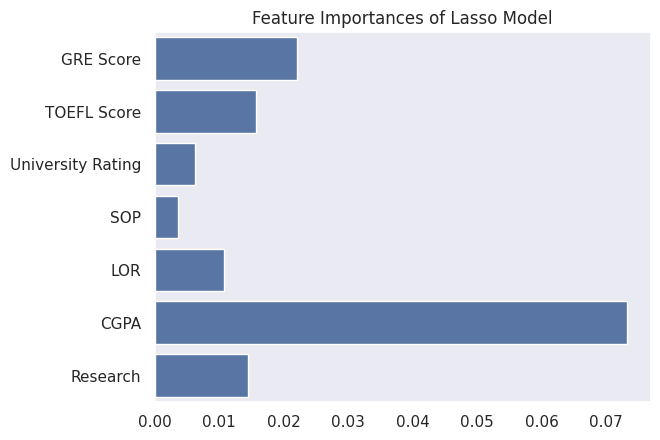

In [120]:
sns.barplot(x = lasso_model.coef_,y = X_train.columns)
plt.ylabel('')
plt.title("Feature Importances of Lasso Model")
plt.show()

## Ridge Regression



In [121]:
ridge_test_scores = []
ridge_train_scores = []
for alpha in [0,1e-6, 1e-5, 1e-4, 1e-3, 0.01,10,20,50,100,500]:
	ridge_model = Ridge(alpha = alpha)
	ridge_model.fit(X_train_scaled,y_train)

	ridge_test_scores.append(ridge_model.score(X_test_scaled,y_test))
	ridge_train_scores.append(ridge_model.score(X_train_scaled,y_train))

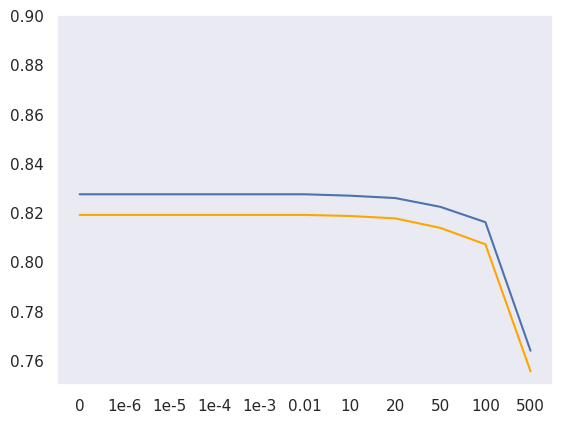

In [122]:
alpha_values = ['0','1e-6', '1e-5', '1e-4', '1e-3', '0.01','10','20','50','100','500']
sns.lineplot(x = alpha_values,y = ridge_test_scores)
sns.lineplot(x = alpha_values,y = ridge_train_scores,color='orange')
plt.ylim([0.75,0.90])
plt.show()

### Observations
<strong>From here we find that weightage of L2 should be equal to zero. No need to perform L2 regression and find its value for other metrics

## ElasticNet

In [123]:
alpha = np.arange(1,10,1)*(10**-3)
l1_ratio = np.arange(1,10,1)*(10**-2)

elastic_net_cv_model = ElasticNetCV(alphas = alpha,l1_ratio = l1_ratio,cv = 10,random_state = 33)
elastic_net_cv_model.fit(X_train_scaled,y_train)

print("Training Score:",elastic_net_cv_model.score(X_train_scaled,y_train))
print("Testing Score:",elastic_net_cv_model.score(X_test_scaled,y_test))
print("Alphas:",elastic_net_cv_model.alpha_)
print("LT Ratio:",elastic_net_cv_model.l1_ratio_)

Training Score: 0.8188888280875976
Testing Score: 0.8271153519188491
Alphas: 0.009000000000000001
LT Ratio: 0.01


### Observation
1. Even the best ElaticNet model gives the same score as of baseline Model.

## KFold Cross Validation

**As the number of records is low we can apply KFold Cross Validation**

**Note**<br>
kf.split returns implicit indices, so you cannot use `X_train_fold = X_train[train_index]` as this extracts explicit indexes<br>instead you can use `X_train_fold = X_train.iloc[train_index]` which extracts implicit indexes

In [124]:
kf = KFold(n_splits = 10)
train_fold_scores = []
val_fold_scores = []
for train_index,val_index in list(kf.split(X_train)):

  X_train_fold,X_val_fold = X_train.iloc[train_index,:],X_train.iloc[val_index,:]
  y_train_fold,y_val_fold = y_train.iloc[train_index],y_train.iloc[val_index]

  pipe = make_pipeline(StandardScaler(),LinearRegression())
  pipe.fit(X_train_fold,y_train_fold)

  train_fold_scores.append(pipe.score(X_train_fold,y_train_fold))
  val_fold_scores.append(pipe.score(X_train_fold,y_train_fold))

In [125]:
print(f"Training Score using KFold cross validation for k = 10 is {np.mean(train_fold_scores).round(2)}")
print(f"Validation Score using KFold cross validation for k = 10 is {np.mean(val_fold_scores).round(2)}")

Training Score using KFold cross validation for k = 10 is 0.82
Validation Score using KFold cross validation for k = 10 is 0.82


### Observations
1. The model shows consistent performance with 81% accuracy in both training and validation sets.






# Testing of Assumptions

## Multi Collinearity

In [126]:
X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [127]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.55
0,GRE Score,4.38
1,TOEFL Score,4.11
3,SOP,2.80
2,University Rating,2.64
4,LOR,2.03
6,Research,1.51


**VIF of every feature is less than 5, so no need to drop any feature**

## Mean of residuals Test for Lasso

In [128]:
print("Mean of residuals for Lasso Model for training dataset",residual_lasso_train.mean())
print("Mean of residuals for Lasso Model for testing dataset",residual_lasso_test.mean())

Mean of residuals for Lasso Model for training dataset 1.1649940271733308e-16
Mean of residuals for Lasso Model for testing dataset 0.003994139810770887


## Residual Plot/Heteroscedasticity Check

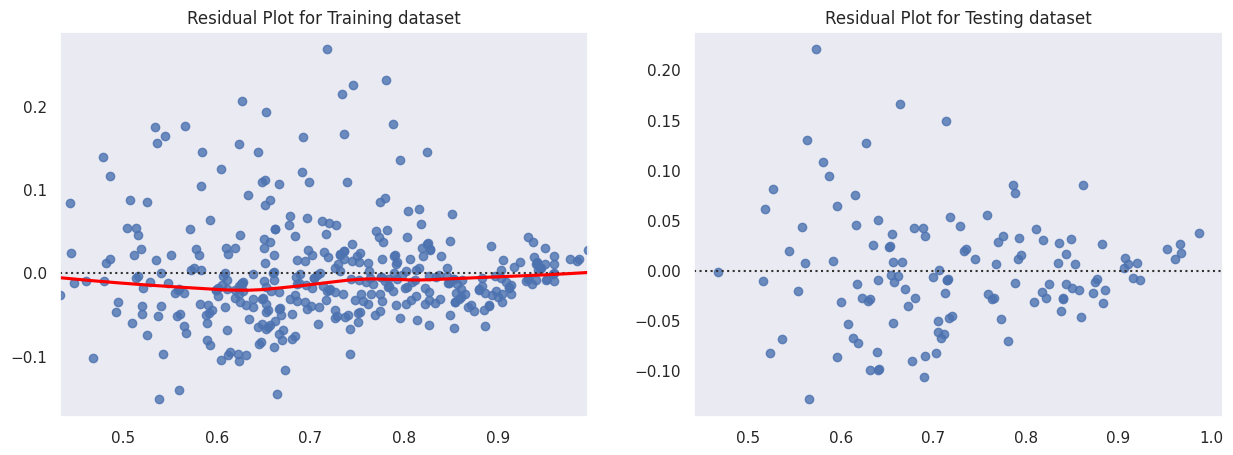

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.residplot(x = y_pred_train,y= residual_lasso_train, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Training dataset')
plt.ylabel('')

plt.subplot(1,2,2)
sns.residplot(x = y_pred_test,y= residual_lasso_test,)
plt.title('Residual Plot for Testing dataset')
plt.ylabel('')
plt.show()

### Observations
1. It is cleary visible that the residual plot is not showing any clear pattern so there is **linearity in variables**
2. As there is variance in residual, we can consider it to be **Homoscedastic.**

## Normality of Residuals

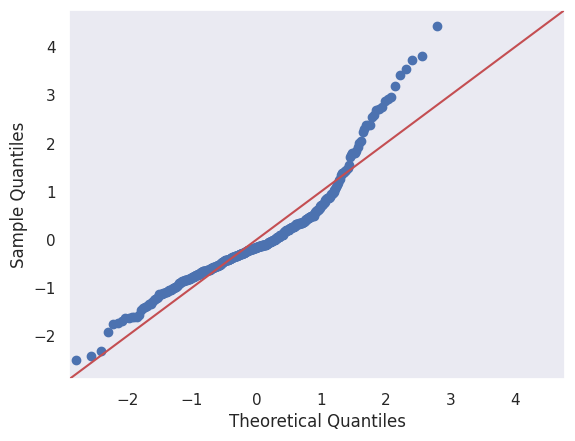

In [130]:
sm.qqplot(residual_lasso_train,line = '45',fit =True)
plt.subplot(1,1,1)
plt.show()

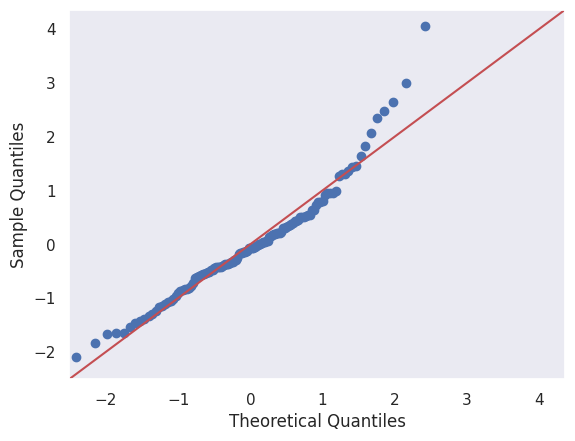

In [131]:
sm.qqplot(residual_lasso_test,line = '45',fit =True)
plt.subplot(1,1,1)
plt.show()

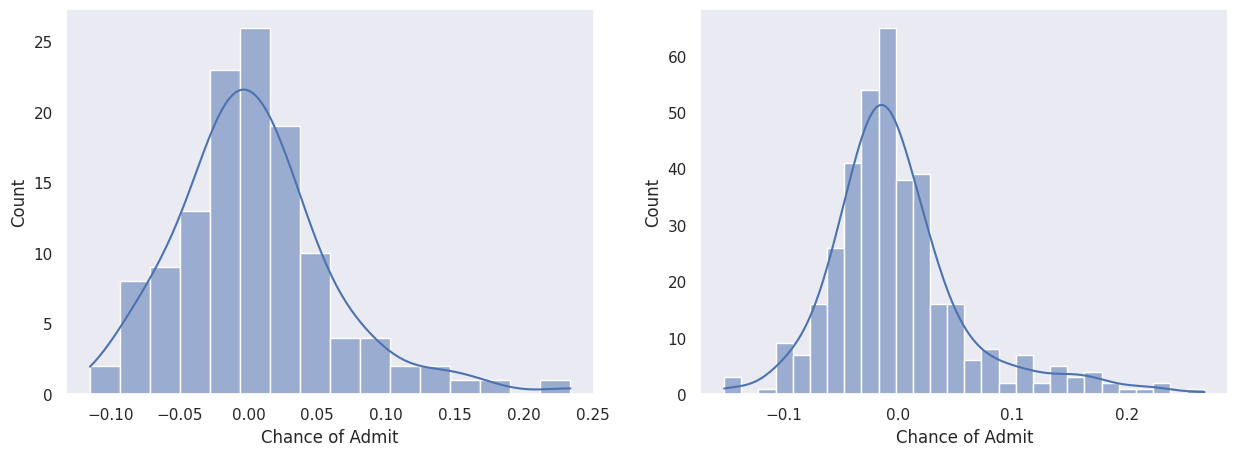

In [132]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x= residual_lasso_test,kde = True)

plt.subplot(1,2,2)
sns.histplot(x= residual_lasso_train,kde = True)

plt.show()

### Observations
1. From the graphs we can see the dataset are normally distributed

# Final Model
## Best Fitted Model & Feature Importance

The baseline model emerges as the best fit, with an alpha of 1e-6 for Lasso and 0 for Ridge. Despite similar scores with the Lasso model, Occam's Razor suggests choosing the simpler solution, making the Baseline Model equally effective.
Feature Importance

Upon coefficient comparison, CGPA stands out as the most crucial feature.

## Predictions for Test Data Points

In [133]:
final_model = make_pipeline(StandardScaler(),LinearRegression())
final_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [134]:
final_model.predict(np.array([317,106,2,2.0,3.5,8.12,0]).reshape(1,-1))

array([0.63991547])

**As CGPA was most important feature let's try changing it how the probability changes**

In [135]:
final_model.predict(np.array([317,106,2,2.0,3.5,9.9,1]).reshape(1,-1))

array([0.87787965])

In [136]:
final_model.predict(np.array([317,106,5,5.0,5.0,10,1]).reshape(1,-1))

array([0.93465025])

In [137]:
final_model.predict(np.array([317,106,5,5.0,5.0,10,0]).reshape(1,-1))

array([0.90555781])

# Insights and Recommendations

**Best fitted Model**
1. The baseline model emerges as the best fit, with an alpha of 1e-6 for Lasso and 0 for Ridge. Despite similar scores with the Lasso model, Occam's Razor suggests choosing the simpler solution, making the **Baseline Model** equally effective.

**Feature Importance**
1. Upon coefficient comparison, CGPA stands out as the most crucial feature.

**Additional Data sources for Model Improvements**
1. A larger dataset could enhance the model's effectiveness, allowing it to capture a more diverse range of patterns and relationships. Additional records would provide a more robust foundation for predictive analysis.
2. Beyond research experience, incorporating insights into a candidate's broader professional and extracurricular experiences can be pivotal.
3. Including details about relevant certifications or qualifications that candidates may possess, especially in fields where certifications are highly valued.
4. The reputation of the candidate's undergraduate institution may be a relevant factor, especially if certain institutions are known for producing high-achieving students.

**Model Implementation in the Real World**
1. Implement the model into the admissions process to automate the initial screening, making the process more efficient and reducing manual workload.

2. Use the model as a decision support tool during admission committee meetings to provide insights into each candidate's predicted success based on the available data.


**Potential Business Benefits**

1. Institutions can allocate resources more effectively by focusing on candidates with higher predicted success, optimizing the admission process.
2. Enhance the decision-making process by providing a data-driven approach to evaluate candidates, reducing biases and subjectivity.
3. Institutions using advanced predictive models may gain a competitive edge in attracting high-potential candidates and improving their overall academic reputation.
4. By automating parts of the admissions process, institutions can reduce costs associated with manual application reviews and decision-making.





